In [1]:
import scipy.integrate
import numpy
import matplotlib.pyplot as plt
# beta가 감염률
# gamma가 회복률

In [2]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [3]:
# ODEs
def SIR_model(y, t, beta, gamma):
    S, I, R = y
    
    dS_dt = -beta*S*I
    dI_dt = beta*S*I - gamma*I
    dR_dt = gamma*I
    
    return([dS_dt,dI_dt,dR_dt])

In [4]:
# Initial conditions
# 인구수 51780579
S0 = 89886
I0 = 3526
R0 = 47
#beta = 0.1
gamma = 0.1

# Time vector
t = numpy.linspace(0,100,10000)
t


array([0.00000000e+00, 1.00010001e-02, 2.00020002e-02, ...,
       9.99799980e+01, 9.99899990e+01, 1.00000000e+02])

In [5]:
S0 + I0 + R0

93459

In [7]:
# 336*93459 = 31,402,224‬
Ro = 3.11 # 1인당 전파율
To = 336 # 14*24 회복기간 2주  *  24시간
beta = (Ro/To) + (Ro/(To*S0))
#beta = 0.005
print(beta)

# Result
solution = scipy.integrate.odeint(SIR_model, [S0,I0,R0], t, args=(beta, gamma))
solution = numpy.array(solution)

0.0092560553553019


In [8]:
solution

array([[8.98860000e+04, 3.52600000e+03, 4.70000000e+01],
       [4.17280470e+02, 9.29366760e+04, 1.05043503e+02],
       [7.43327462e-02, 9.32606139e+04, 1.98311772e+02],
       ...,
       [1.06888142e-12, 4.25100104e+00, 9.34547490e+04],
       [1.06845806e-12, 4.24675174e+00, 9.34547532e+04],
       [1.06803496e-12, 4.24250668e+00, 9.34547575e+04]])

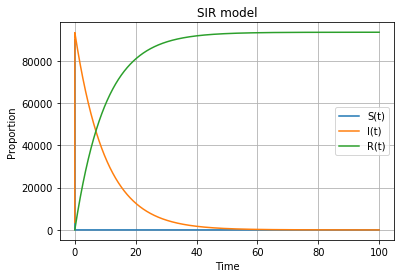

In [9]:
# plot result
plt.figure(figsize=[6,4])
plt.plot(t, solution[:, 0], label="S(t)")
plt.plot(t, solution[:, 1], label="I(t)")
plt.plot(t, solution[:, 2], label="R(t)")
plt.grid()
plt.legend()
plt.xlabel("Time")
plt.ylabel("Proportion")
plt.title("SIR model")
plt.show()

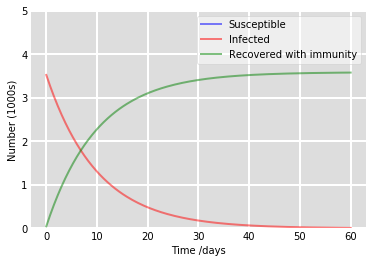

In [17]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Total population, N.
N = 93459
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 3526, 47
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.0005, 1./10 
# A grid of time points (in days)
t = np.linspace(0, 60, 160)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,5)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()